# Analizing Star Wars Survey

Star Wars is an American epic space opera[1] multimedia franchise created by George Lucas, which began with the eponymous 1977 film[b] and quickly became a worldwide pop-culture phenomenon. 


<br>



<img src="http://nerdsontherocks.com/wp-content/uploads/2015/11/the-empire-strikes-back-dream-poster.jpg" alt="star wars" width="800" height="100"/>


<br>


In 2014 the team at FiveThirtyEight became interested in answering some questions about Star Wars fans, the information has been extracted from the [GitHub repository](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey) that they elaborated with the result of the surveys.

**Data dictionary**:

The data has several columns, including the following:

|||
|:--|:--|
|`RespondentID`|— An anonymized ID for the respondent (person taking the survey).|
|`Gender`| — the respondent's gender.|
|`Age`| — the respondent's `age`.|
|`Household Income` |— the respondent's `income`.|
|`Education` |— the respondent's education `level`.|
|`Location (Census Region)`| — the respondent's `location`.|
|`Have you seen any of the 6 films in the Star Wars franchise?`| — a `Yes` or `No` response.|
|`Do you consider yourself to be a fan of the Star Wars film franchise?` —| a `Yes` or `No` response.|

Que preguntas vamos a hacer?


prerequisitos

    nombre de las librerias que se van a utilizar

Resultados:

    Que es lo que vamos a obtener
    

___  

## Data Exploration

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read in data
star_wars = pd.read_csv("StarWars.csv", encoding="ISO-8859-1")

In [2]:
star_wars.head(3)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central


In [3]:
# Column names in star_wars dataframe
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

___
## Data cleaning tasks.

- Remove **id** of the first row is a `NaN` value, check for repeated.

- Convert the `Yes/No` **string type** answer on `Have you seen any of the 6 films in the Star Wars franchise?` and `Do you consider yourself to be a fan of the Star Wars film franchise?` to **Boolean type** for later use.

- Convert the name of answer from the column 5 to the 9 to a Boolean

- Converting the `NaN` values

- Renaming the columns

In [4]:
# we ensure that these NaN values are not repeated in the first column
star_wars['RespondentID'].value_counts()

3.292880e+09    1
3.289685e+09    1
3.289689e+09    1
3.289689e+09    1
3.289690e+09    1
               ..
3.290667e+09    1
3.290675e+09    1
3.290677e+09    1
3.290679e+09    1
3.288373e+09    1
Name: RespondentID, Length: 1186, dtype: int64

The only `NaN` value has been the one we have already, let's remove it

In [5]:
starwars = star_wars[1:].copy() # from row 1 to the end

In [6]:
# looking for NaN's
starwars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False)

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [7]:
starwars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False)

Yes    552
NaN    350
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [8]:
# Conversion dictionary
yes_no = {"Yes": True, "No": False}

# Convert Yes/No into True False with Series.map() method. It may use functions or dicts! without parameters. 
starwars["Have you seen any of the 6 films in the Star Wars franchise?"] = starwars[
    "Have you seen any of the 6 films in the Star Wars franchise?"].map(yes_no).copy()

starwars["Do you consider yourself to be a fan of the Star Wars film franchise?"] = starwars[
    "Do you consider yourself to be a fan of the Star Wars film franchise?"
].map(yes_no).copy()

In [9]:
starwars["Have you seen any of the 6 films in the Star Wars franchise?"].value_counts(dropna=False)

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [10]:
starwars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False)

True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

<br>

## Cleaning and Mapping Checkbox Columns

<br>

If the 'value' from the **column 5 to the 9** is the name of the movie, means respondent saw the movie if value is `NaN` the respondent either didn't answer or didn't see the movie. 

We'll assume that they didn't see the movie.

The next columns tell us whether or not the respondent saw the movie:

- `Which of the following Star Wars films have you seen? Please select all that apply`. - Whether or not the respondent saw Star Wars: **Episode I The Phantom Menace**.

- `Unnamed: 4` - Whether or not the respondent saw Star Wars: **Episode II Attack of the Clones**.

- `Unnamed: 5` - Whether or not the respondent saw Star Wars: **Episode III Revenge of the Sith**.

- `Unnamed: 6` - Whether or not the respondent saw Star Wars: **Episode IV A New Hope**.

- `Unnamed: 7` - Whether or not the respondent saw Star Wars: **Episode V The Empire Strikes Back**.

- `Unnamed: 8` - Whether or not the respondent saw Star Wars: **Episode VI Return of the Jedi**.

<br>

##### **If the respondent did see the movie the value is the name of the movie, otherwise we assume that the respondent did not see the movie (it is a `NaN` value)**. 

We will create a dictionary with True and False values and then apply it to rename values in the columns. We will also rename the columns in something more meaningful.

In [11]:
# Coverting each response to True or False
response_toBoolean = {
    "Star Wars: Episode I  The Phantom Menace": True,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True,
    np.NaN: False
}

starwars[starwars.columns[3:9]] = starwars[starwars.columns[3:9]].replace(response_toBoolean)

In [12]:
starwars[starwars.columns[3:9]].tail(5)

,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
1182,True,True,True,True,True,True
1183,True,True,True,True,True,True
1184,False,False,False,False,False,False
1185,True,True,True,True,True,True
1186,True,True,False,False,True,True


In [13]:
# The pandas.DataFrame.rename() method only renames the columns we specify in the dictionary; it won't change the names of other columns. Renaming columns
starwars = starwars.rename(
    columns={
        "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
        "Unnamed: 4": "seen_2",
        "Unnamed: 5": "seen_3",
        "Unnamed: 6": "seen_4",
        "Unnamed: 7": "seen_5",
        "Unnamed: 8": "seen_6",
    }
)

In [14]:
starwars[starwars.columns[3:9]].tail(5)

,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6
1182,True,True,True,True,True,True
1183,True,True,True,True,True,True
1184,False,False,False,False,False,False
1185,True,True,True,True,True,True
1186,True,True,False,False,True,True


## Cleaning the Ranking Columns

The next six columns ask the respondent to rank the Star Wars movies in order from least to most favorite. 1 means the film was the most favorite, and 6 means it was the least favorite.

In [15]:
starwars[starwars.columns[9:15]].tail(5)

,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
1182,5,4,6,3,2,1
1183,4,5,6,2,3,1
1184,NaN,NaN,NaN,NaN,NaN,NaN
1185,4,3,6,5,2,1
1186,6,1,2,3,4,5


In [16]:
starwars[starwars.columns[9:15]].tail(5).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 1182 to 1186
Data columns (total 6 columns):
 #   Column                                                                                                                                         Non-Null Count  Dtype 
---  ------                                                                                                                                         --------------  ----- 
 0   Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.  4 non-null      object
 1   Unnamed: 10                                                                                                                                    4 non-null      object
 2   Unnamed: 11                                                                                                                                    4 non-null      object
 3   Unnamed: 12                       

## Convert rankings into float type

In [17]:
starwars[starwars.columns[9:15]] = starwars[starwars.columns[9:15]].astype(float)

In [18]:
starwars[starwars.columns[9:15]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 1 to 1186
Data columns (total 6 columns):
 #   Column                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                         --------------  -----  
 0   Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.  835 non-null    float64
 1   Unnamed: 10                                                                                                                                    836 non-null    float64
 2   Unnamed: 11                                                                                                                                    835 non-null    float64
 3   Unnamed: 12                  

In [19]:
starwars[starwars.columns[9:15]].tail()

,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
1182,5.0,4.0,6.0,3.0,2.0,1.0
1183,4.0,5.0,6.0,2.0,3.0,1.0
1184,NaN,NaN,NaN,NaN,NaN,NaN
1185,4.0,3.0,6.0,5.0,2.0,1.0
1186,6.0,1.0,2.0,3.0,4.0,5.0


In [20]:
# Rename columns
starwars = starwars.rename(
    columns={
        "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",
        "Unnamed: 10": "ranking_2",
        "Unnamed: 11": "ranking_3",
        "Unnamed: 12": "ranking_4",
        "Unnamed: 13": "ranking_5",
        "Unnamed: 14": "ranking_6",
    }
)

starwars[starwars.columns[9:15]] = starwars[starwars.columns[9:15]].replace(response_toBoolean)
starwars[starwars.columns[9:15]]

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
1,3.0,2.0,1.0,4.0,5.0,6.0
2,False,False,False,False,False,False
3,1.0,2.0,3.0,4.0,5.0,6.0
4,5.0,6.0,1.0,2.0,4.0,3.0
5,5.0,4.0,6.0,2.0,1.0,3.0
...,...,...,...,...,...,...
1182,5.0,4.0,6.0,3.0,2.0,1.0
1183,4.0,5.0,6.0,2.0,3.0,1.0
1184,False,False,False,False,False,False
1185,4.0,3.0,6.0,5.0,2.0,1.0


# Finding the Highest-Ranked Movie

Now that we've cleaned up the ranking columns, we can find the highest-ranked movie quicker. 

To do this, take the mean of each ranking columns using the `pandas.DataFrame.mean()` method on DataFrames, to compute the mean of each ranking columns from the previous screen.

In [21]:
starwars[starwars.columns[9:15]].mean() # Series way

ranking_1    2.628162
ranking_2    2.881113
ranking_3    3.056492
ranking_4    2.306914
ranking_5    1.771501
ranking_6    2.148398
dtype: float64

In [22]:
starwars.iloc[:, 9:15].mean() # Index way

ranking_1    2.628162
ranking_2    2.881113
ranking_3    3.056492
ranking_4    2.306914
ranking_5    1.771501
ranking_6    2.148398
dtype: float64

# Finding the Most Viewed Movie

In [23]:
starwars[starwars.columns[3:9]].sum()

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

In [24]:
%matplotlib inline

Text(-2.5, -0.9, 'The Empire Strikes Back is the best followed the other original trilogy movies')

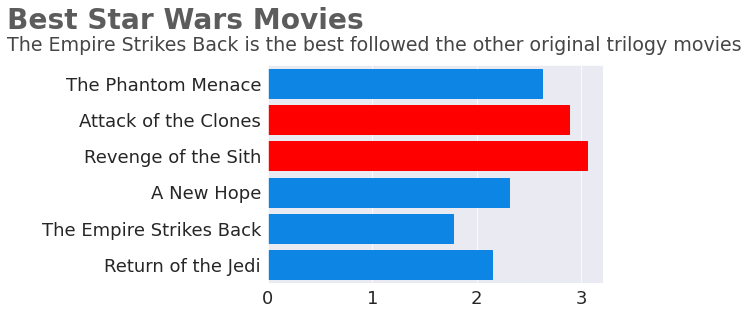

In [25]:
# Plot: best Star Wars
sns.set_style("darkgrid")
ax1 = sns.barplot(data=starwars.iloc[:, 9:15], orient="h", ci=None)

# Colors
for bar in ax1.patches:
    if bar.get_width() < 2.7:
        bar.set_color("#0c85e5")
    else:
        bar.set_color("red")

# Font for titles
font_title = {"size": 28, "weight": "bold", "alpha": 0.75}

# Font for subtitles
font_subtitle = {"size": 19, "alpha": 0.85}

# Tick params
ax1.tick_params(axis="both", which="major", labelsize=18)

labels = [
    "The Phantom Menace",
    "Attack of the Clones",
    "Revenge of the Sith",
    "A New Hope",
    "The Empire Strikes Back",
    "Return of the Jedi",
]

# y tick labels
ax1.set_yticklabels(labels=labels)

# Title and subtitle
ax1.text(x=-2.5, y=-1.5, s="Best Star Wars Movies", fontdict=font_title)

ax1.text(
    x=-2.5,
    y=-0.9,
    s="The Empire Strikes Back is the best followed the other original trilogy movies",
    fontdict=font_subtitle,
)

# Exploring the Data by Binary Segments

Text(-2.7, -0.9, 'The Episode V is still the best Star Wars movie scored a bit better by men')

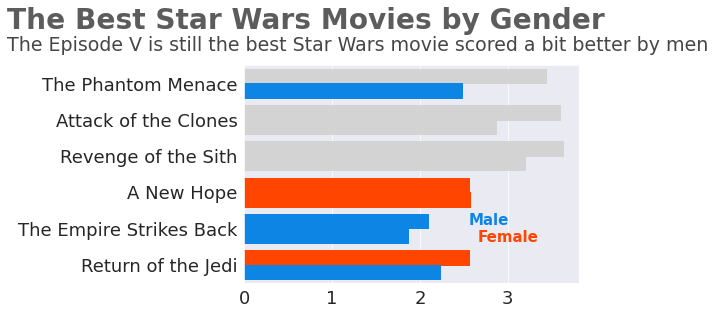

In [26]:
# Melt the dataframe to prepare the data for plotting
melted_ranking = starwars.melt(
    id_vars=["Gender"], value_vars=starwars.iloc[:, 9:15], value_name="Ranking"
)

# Plot: The Best Star Movies by Gender
ax2 = sns.barplot(
    x="Ranking", y="variable", data=melted_ranking, hue="Gender", ci=None, orient="h"
)

# Legend
ax2.get_legend().remove()
ax2.text(x=2.55, y=3.9, s="Male", color="#0c85e5", weight="bold", size=15)
ax2.text(x=2.65, y=4.37, s="Female", color="orangered", weight="bold", size=15)

# Colors
for bar in ax2.patches:
    if bar.get_width() < 2.5:
        bar.set_color("#0c85e5")
    elif bar.get_width() < 2.6:
        bar.set_color("orangered")
    else:
        bar.set_color("lightgrey")

# Tick params
ax2.tick_params(axis="both", which="major", labelsize=18)

# Remove labels
ax2.set_xlabel("")
ax2.set_ylabel("")

# y tick labels
ax2.set_yticklabels(labels=labels)

# Title and subtitle
ax2.text(x=-2.7, y=-1.5, s="The Best Star Wars Movies by Gender", fontdict=font_title)

ax2.text(
    x=-2.7,
    y=-0.9,
    s="The Episode V is still the best Star Wars movie scored a bit better by men",
    fontdict=font_subtitle,
)